In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [39]:
df = pd.read_excel('Book1.xlsx')

In [40]:
df

,Date,MONTHLY OIL [m³],MONTHLY WATER [m³]
0,1996-11-01,113.2,0.0
1,1996-12-01,0.0,0.0
2,1997-01-01,118.3,0.0
3,1997-02-01,9126.6,0.0
4,1997-03-01,13228.3,0.0
...,...,...,...
308,2022-07-01,1011.2,6226.2
309,2022-08-01,1675.3,7012.4
310,2022-09-01,1877.1,8262.9
311,2022-10-01,1956.7,7720.5


In [41]:
df.columns

Index(['      Date ', 'MONTHLY OIL [m³]    ', 'MONTHLY WATER [m³]    '], dtype='object')

In [42]:
df.describe()

,MONTHLY OIL [m³],MONTHLY WATER [m³]
count,313.000000,313.000000
mean,5911.398722,3373.993610
std,3787.682572,3413.689569
min,0.000000,0.000000
25%,2932.000000,790.200000
50%,4522.000000,2188.500000
75%,7913.000000,5578.000000
max,15660.500000,13763.100000


In [43]:
df.dtypes

      Date                datetime64[ns]
MONTHLY OIL [m³]                 float64
MONTHLY WATER [m³]               float64
dtype: object

In [44]:
df['Date']=df['      Date ']
df = df.drop(columns='      Date ')

In [45]:
df

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date
0,113.2,0.0,1996-11-01
1,0.0,0.0,1996-12-01
2,118.3,0.0,1997-01-01
3,9126.6,0.0,1997-02-01
4,13228.3,0.0,1997-03-01
...,...,...,...
308,1011.2,6226.2,2022-07-01
309,1675.3,7012.4,2022-08-01
310,1877.1,8262.9,2022-09-01
311,1956.7,7720.5,2022-10-01


In [46]:
df

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date
0,113.2,0.0,1996-11-01
1,0.0,0.0,1996-12-01
2,118.3,0.0,1997-01-01
3,9126.6,0.0,1997-02-01
4,13228.3,0.0,1997-03-01
...,...,...,...
308,1011.2,6226.2,2022-07-01
309,1675.3,7012.4,2022-08-01
310,1877.1,8262.9,2022-09-01
311,1956.7,7720.5,2022-10-01


In [47]:
df['WOR']=df['MONTHLY WATER [m³]    ']/df['MONTHLY OIL [m³]    ']

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Month'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month - 11


In [49]:
df["WOR'"]=df["WOR"]/df['Month']

In [70]:
df

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,Month,WOR',Month_
0,113.2,0.0,1996-11-01,0.000000,0,NaN,0
1,0.0,0.0,1996-12-01,NaN,1,NaN,1
2,118.3,0.0,1997-01-01,0.000000,2,0.000000,3
3,9126.6,0.0,1997-02-01,0.000000,3,0.000000,6
4,13228.3,0.0,1997-03-01,0.000000,4,0.000000,10
...,...,...,...,...,...,...,...
308,1011.2,6226.2,2022-07-01,6.157239,308,0.019991,47586
309,1675.3,7012.4,2022-08-01,4.185758,309,0.013546,47895
310,1877.1,8262.9,2022-09-01,4.401950,310,0.014200,48205
311,1956.7,7720.5,2022-10-01,3.945674,311,0.012687,48516


In [50]:
df.columns

Index(['MONTHLY OIL [m³]    ', 'MONTHLY WATER [m³]    ', 'Date', 'WOR',
       'Month', 'WOR''],
      dtype='object')

### boxplot

In [51]:
df[['MONTHLY PRODUCTION DAYS      ']].boxplot()

KeyError: "None of [Index(['MONTHLY PRODUCTION DAYS      '], dtype='object')] are in the [columns]"

<Axes: >

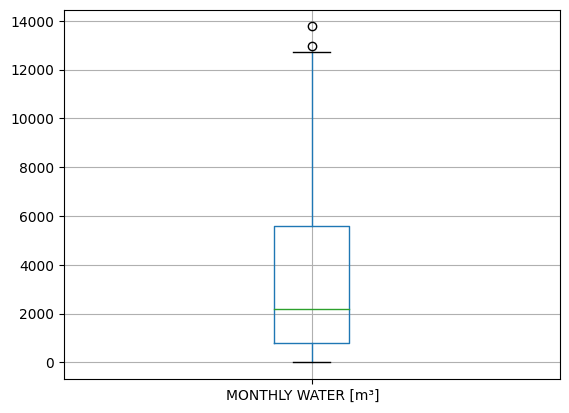

In [52]:
df[[ 'MONTHLY WATER [m³]    ']].boxplot()

<Axes: >

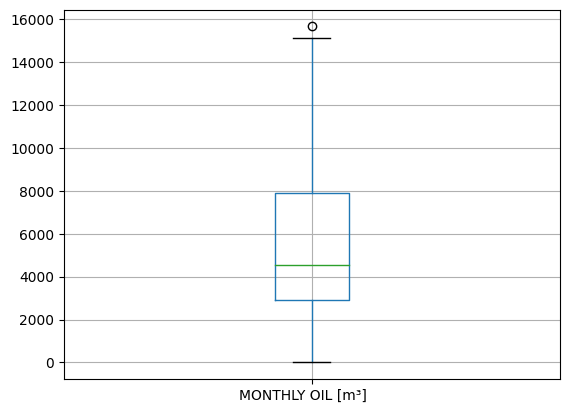

In [53]:
df[['MONTHLY OIL [m³]    ']].boxplot()

<Axes: >

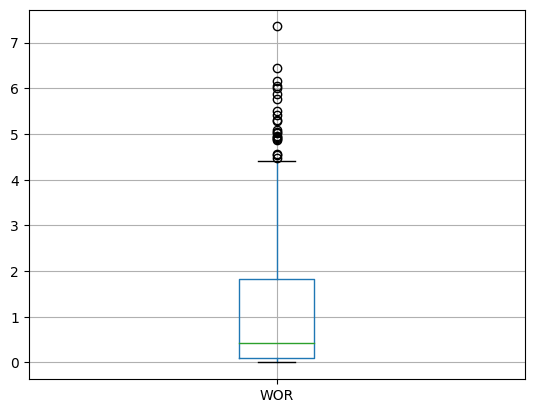

In [54]:
df[['WOR']].boxplot()

<Axes: >

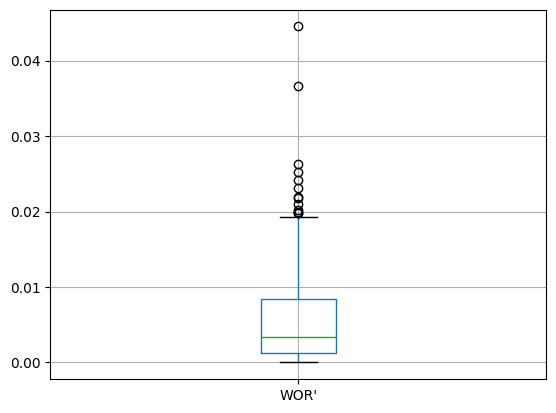

In [55]:
df[["WOR'"]].boxplot()

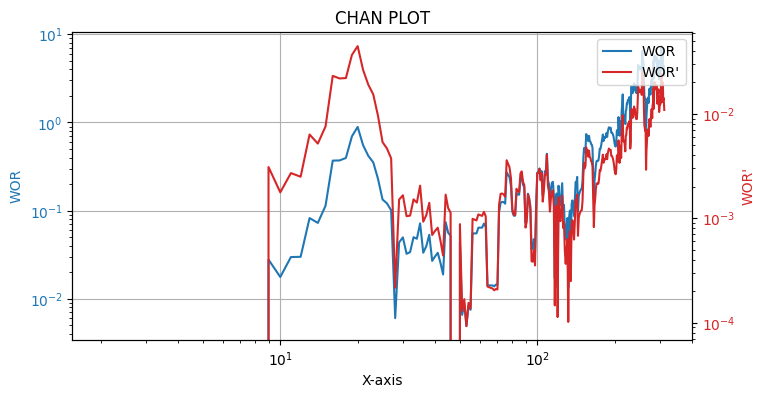

In [56]:
fig, ax1 = plt.subplots(figsize=(8, 4))

color = 'tab:blue'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('WOR', color=color)
ax1.loglog(df['Month'],df['WOR'], label='WOR', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("WOR'", color=color)
ax2.loglog(df['Month'], df["WOR'"], label="WOR'", color=color)
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('CHAN PLOT')
plt.show()


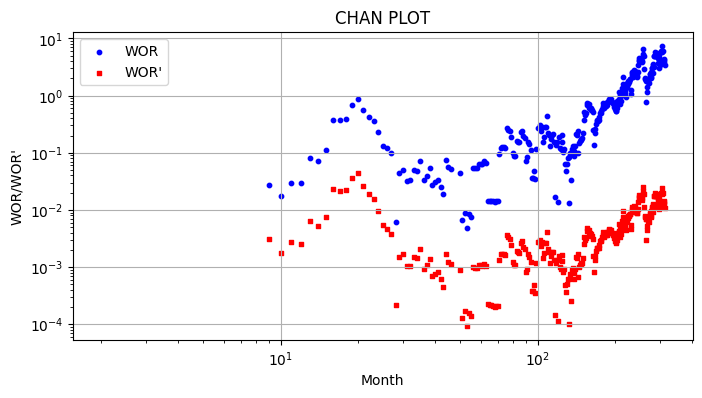

In [57]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Month'], df['WOR'], label='WOR', color='blue', marker='o', s=10)
plt.scatter(df['Month'], df["WOR'"], label="WOR'", color='red', marker='s', s=10)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Month')
plt.ylabel("WOR/WOR'")
plt.legend()
plt.title('CHAN PLOT')
plt.grid(True)
plt.show()

In [58]:
df['Month_'] = df['Month'].cumsum()

In [59]:
df

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,Month,WOR',Month_
0,113.2,0.0,1996-11-01,0.000000,0,NaN,0
1,0.0,0.0,1996-12-01,NaN,1,NaN,1
2,118.3,0.0,1997-01-01,0.000000,2,0.000000,3
3,9126.6,0.0,1997-02-01,0.000000,3,0.000000,6
4,13228.3,0.0,1997-03-01,0.000000,4,0.000000,10
...,...,...,...,...,...,...,...
308,1011.2,6226.2,2022-07-01,6.157239,308,0.019991,47586
309,1675.3,7012.4,2022-08-01,4.185758,309,0.013546,47895
310,1877.1,8262.9,2022-09-01,4.401950,310,0.014200,48205
311,1956.7,7720.5,2022-10-01,3.945674,311,0.012687,48516


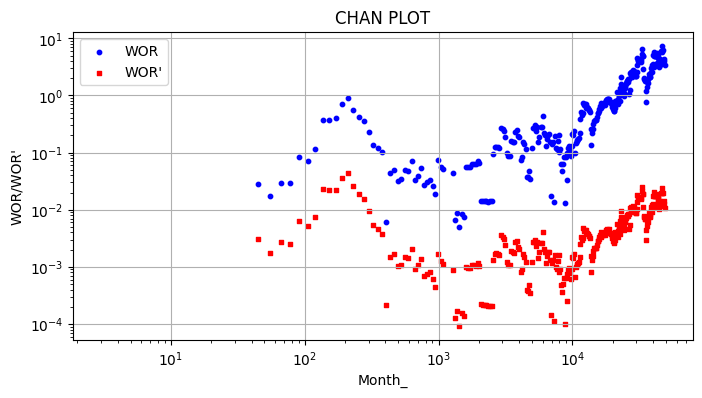

In [60]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Month_'], df['WOR'], label='WOR', color='blue', marker='o', s=10)
plt.scatter(df['Month_'], df["WOR'"], label="WOR'", color='red', marker='s', s=10)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Month_')
plt.ylabel("WOR/WOR'")
plt.legend()
plt.title('CHAN PLOT')
plt.grid(True)
plt.show()

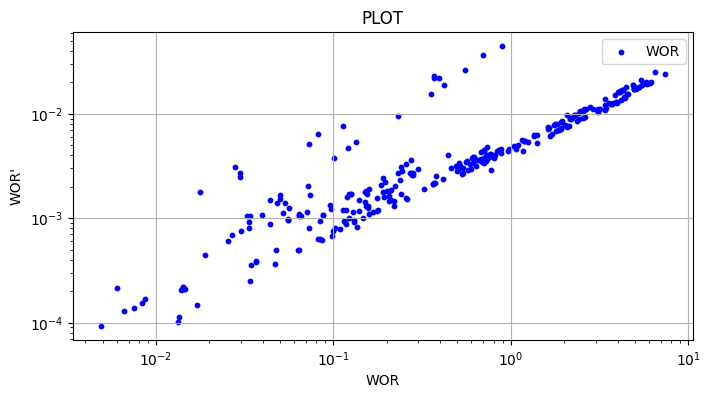

In [68]:
plt.figure(figsize=(8, 4))
plt.scatter(df['WOR'], df["WOR'"], label='WOR', color='blue', marker='o', s=10)
# plt.scatter(df['Month_'], df["WOR'"], label="WOR'", color='red', marker='s', s=10)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('WOR')
plt.ylabel("WOR'")
plt.legend()
plt.title('PLOT')
plt.grid(True)
plt.show()

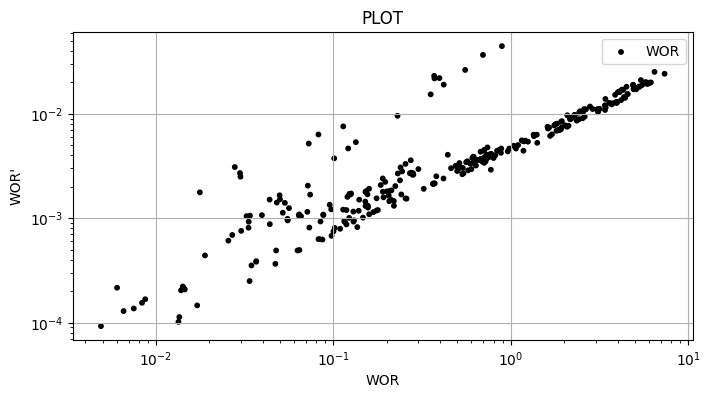

In [71]:

patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

# Initialize a list to store the pattern for each point
point_patterns = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    wor = row['WOR']
    wor_prime = row["WOR'"]
    
    # Check each pattern's criteria based on logarithmic values
    pattern_matched = None
    for pattern_name, criteria in patterns.items():
        wor_range = criteria['WOR']
        wor_prime_range = criteria["WOR'"]
        
        if (wor_range[0] <= wor <= wor_range[1] and
            wor_prime_range[0] <= wor_prime <= wor_prime_range[1]):
            pattern_matched = pattern_name
            break  # Exit the loop once a pattern is found
    
    # Append the identified pattern to the list
    point_patterns.append(pattern_matched)

# Create a color map for different patterns
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

# Create a list of colors corresponding to each point's pattern
point_colors = [pattern_colors[pattern] if pattern in pattern_colors else 'k' for pattern in point_patterns]

# Plot the points with colors
plt.figure(figsize=(8, 4))
plt.scatter(df['WOR'], df["WOR'"], label='WOR', c=point_colors, marker='o', s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('WOR')
plt.ylabel("WOR'")
plt.legend()
plt.title('PLOT')
plt.grid(True)
plt.show()


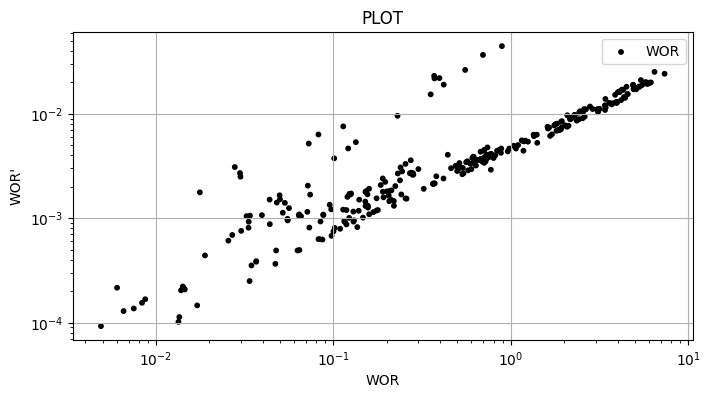

In [69]:
patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

# Initialize a list to store the pattern for each point
point_patterns = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    wor = row['WOR']
    wor_prime = row["WOR'"]
    
    # Check each pattern's criteria based on logarithmic values
    pattern_matched = None
    for pattern_name, criteria in patterns.items():
        wor_range = criteria['WOR']
        wor_prime_range = criteria["WOR'"]
        
        if (wor_range[0] <= wor <= wor_range[1] and
            wor_prime_range[0] <= wor_prime <= wor_prime_range[1]):
            pattern_matched = pattern_name
            break  # Exit the loop once a pattern is found
    
    # Append the identified pattern to the list
    point_patterns.append(pattern_matched)

# Create a color map for different patterns
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

# Create a list of colors corresponding to each point's pattern
point_colors = [pattern_colors[pattern] if pattern in pattern_colors else 'k' for pattern in point_patterns]

# Plot the points with colors
plt.figure(figsize=(8, 4))
plt.scatter(df['WOR'], df["WOR'"], label='WOR', c=point_colors, marker='o', s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('WOR')
plt.ylabel("WOR'")
plt.legend()
plt.title('PLOT')
plt.grid(True)
plt.show()


In [61]:
df['WOR']=df['WOR'].astype(float)
df["WOR'"]=df["WOR'"].astype(float)

In [62]:
patterns = {
    'Constant WOR': {'WOR': (0, 1), "WOR'": (1, 2)},
    'Normal Displacement': {'WOR': (1, 1), "WOR'": (1, 3)},
    'Multilayer Channeling': {'WOR': (1, 2), "WOR'": (3, 10)},
    'Rapid Channeling': {'WOR': (2, 10), "WOR'": (2, 10)}
}


In [63]:
df.head(15)

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,Month,WOR',Month_
0,113.2,0.0,1996-11-01,0.000000,0,NaN,0
1,0.0,0.0,1996-12-01,NaN,1,NaN,1
2,118.3,0.0,1997-01-01,0.000000,2,0.000000,3
3,9126.6,0.0,1997-02-01,0.000000,3,0.000000,6
4,13228.3,0.0,1997-03-01,0.000000,4,0.000000,10
5,10417.0,0.0,1997-04-01,0.000000,5,0.000000,15
6,7370.6,0.0,1997-05-01,0.000000,6,0.000000,21
7,8733.0,0.0,1997-06-01,0.000000,7,0.000000,28
8,9843.1,0.0,1997-07-01,0.000000,8,0.000000,36
9,14039.0,390.3,1997-08-01,0.027801,9,0.003089,45


In [29]:
patterns = {
    'Constant WOR': {'WOR': (0, 1), "WOR'": (1, 2)},
    'Normal Displacement': {'WOR': (1, 1), "WOR'": (1, 3)},
    'Multilayer Channeling': {'WOR': (1, 2), "WOR'": (3, 10)},
    'Rapid Channeling': {'WOR': (2, 10), "WOR'": (2, 10)}
}

# Initialize a variable to store the identified pattern for each row
pattern_found = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    if index == 0:
        continue  # Skip the first row as there's no previous row to calculate differences
    
    wor_diff = abs(row['WOR'] - df.at[index - 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df.at[index - 1, "WOR'"])
    
    # Check each pattern's criteria based on differences
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break  # Exit the loop once a pattern is found
    
    # If no pattern matched, append None to indicate no pattern
    if not pattern_matched:
        pattern_found.append(None)

# Add the identified pattern information to the DataFrame
df['Pattern'] = pattern_found

# Check if the length of pattern_found matches the number of rows
if len(pattern_found) != len(df):
    pattern_found.append(None)  # Add None for any remaining rows



ValueError: Length of values (312) does not match length of index (313)

In [64]:
patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

# Initialize a variable to store the identified pattern for each row
pattern_found = []

# Iterate through the DataFrame rows up to the second-to-last row
for index, row in df.iloc[:-1].iterrows():  # Exclude the last row
    wor_diff = abs(row['WOR'] - df.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df.at[index + 1, "WOR'"])
    
    # Check each pattern's criteria based on differences
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break  # Exit the loop once a pattern is found
    
    # If no pattern matched, append None to indicate no pattern
    if not pattern_matched:
        pattern_found.append(None)

# Add the identified pattern information to the DataFrame
df['Pattern'] = pattern_found

ValueError: Length of values (312) does not match length of index (313)

In [65]:
# Plot the patterns for each valid pattern
plt.figure(figsize=(10, 6))

# Define colors or markers for each pattern
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

for pattern, color in pattern_colors.items():
    pattern_df = df[df['Pattern'] == pattern]
    if not pattern_df.empty:
        plt.scatter(pattern_df.index, pattern_df['WOR'], label=pattern, c=color)

plt.xlabel('Index')
plt.ylabel('WOR')
plt.legend()
plt.title('Identified Patterns (Log Scale)')
plt.grid(True)
plt.show()


KeyError: 'Pattern'

<Figure size 1000x600 with 0 Axes>

In [66]:

patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

# Initialize a variable to store the identified pattern for each row
pattern_found = []

# Iterate through the DataFrame rows up to the third-to-last row
for index, row in df.iloc[:-2].iterrows():  # Exclude the last two rows
    wor_diff = abs(row['WOR'] - df.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df.at[index + 1, "WOR'"])
    
    # Check each pattern's criteria based on differences
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break  # Exit the loop once a pattern is found
    
    # If no pattern matched, append None to indicate no pattern
    if not pattern_matched:
        pattern_found.append(None)

# Add the identified pattern information to the DataFrame
df['Pattern'] = pattern_found

# Plot the patterns for each valid pattern
plt.figure(figsize=(10, 6))

# Define colors or markers for each pattern
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

for pattern, color in pattern_colors.items():
    pattern_df = df[df['Pattern'] == pattern]
    if not pattern_df.empty:
        plt.scatter(pattern_df.index, pattern_df['WOR'], label=pattern, c=color)

plt.xlabel('Index')
plt.ylabel('WOR')
plt.legend()
plt.title('Identified Patterns (Log Scale)')
plt.grid(True)
plt.show()


ValueError: Length of values (311) does not match length of index (313)